In [3]:
# Libraries for Data Analysis
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Libraries for Graphical Interpretations
# ! pip install plotnine

# from plotnine import *


In [6]:
!pip install fredapi
# ! pip install yfinance
# import yfinance as yf

In [7]:
from fredapi import Fred
fred = Fred(api_key = '2d063b4e6530724ac4a200b65467a14b')

### Monthly Macro Economics Data - Preprocessing
#### Source FRED ST.Louis/OECD

In [11]:

# Inflation 
# Monthly 10-year Breakeven Inflation Rate(Monthly)
BEI_M = fred.get_series('T10YIEM', observation_start='1/1/2003',
                                    observation_end='12/1/2017')


# CPI
# Monthly Energy CPI for US (2003 2017)
ENGCPI_M = fred.get_series('USACPIENGMINMEI', observation_start='1/1/2003',
                                            observation_end='12/1/2017')



# Money Supply M2
# Monthly Money Supply M2 for US (2003 - 2019)
M2 = fred.get_series('M2SL', observation_start='1/1/2003',
                                            observation_end='12/1/2017')

# ACDGNO 
#Monthly Value of Manufacturers' New Orders for Consumer Goods: Consumer Durable Goods Industries (ACDGNO)
ACDGNO = fred.get_series('ACDGNO', observation_start='1/1/2003',
                                            observation_end='12/1/2017')

# POILWTIUSDM
# Monthly Global price of WTI Crude
Global_Crude_M = fred.get_series('POILWTIUSDM', observation_start='1/1/2003',
                                            observation_end='12/1/2017')

# NATURALGASD11
# Monthly Natural Gas Consumption
gas_consumption_M = fred.get_series('NATURALGASD11', observation_start='1/1/2003',
                                            observation_end='12/1/2017')

# Monthly Crude and Natural Gas Future Contracts
crude_gas_monthly = pd.read_csv('../load_macro_var_and_csvfiles/crude_gas_monthly.csv')
crude_gas_monthly = pd.DataFrame(crude_gas_monthly)
crude_gas_monthly.set_index('Date', inplace = True)


# RGDP_A = pd.DataFrame(RGDP_A, columns= ['annual_rgdp']) 
BEI_M = pd.DataFrame(BEI_M, columns=['breakeven_inflation'])
ENGCPI_M = pd.DataFrame(ENGCPI_M, columns=['CPI for Energy'])
M2_M = pd.DataFrame(M2, columns=['M2SL in Billions of Dollars'])
ACDGNO_M = pd.DataFrame(ACDGNO, columns=['ACDGNO in Million of Dollars'])
Global_Crude_M = pd.DataFrame(Global_Crude_M, columns=['Global Price U.S. Dollars per Barrel'])
Gas_Cnsmp_M = pd.DataFrame(gas_consumption_M, columns=['NG Consumption Billion Cubic Feet']) 





#### Loading the Monthly Consumer Price Index (CPI) Inflation of Energy

In [13]:
# Monthly Inflation Consumer Price Index (CPI)
inflation_cpi_M = pd.read_csv('../load_macro_var_and_csvfiles/Inflation(CPI)_Energy_US_M.csv')

# inflation_cpi_Q['Date'] = pd.to_datetime(inflation_cpi_Q['Date'])
# inflation_cpi_Q.set_index('Date', inplace = True)

# inflation_cpi_M = inflation_cpi_Q.resample(rule = 'M').ffill()

# inflation_cpi_M

#### Loading the Monthly Short-Term Interest Rate 

In [14]:
# Monthly Monthly Short-Term Interest Rate

interest_rate_M = pd.read_csv('../load_macro_var_and_csvfiles/interest_rate_shortterm_US_M.csv')


#### Concatenating the Macros DataFrames

In [15]:
# Concatenating the dataframes
macro_data_monthly = pd.concat([BEI_M, ENGCPI_M, M2_M, ACDGNO_M, crude_gas_monthly, 
                                Global_Crude_M, Gas_Cnsmp_M], axis = 'columns')

In [16]:
stock_data_monthly.head()

NameError: name 'stock_data_monthly' is not defined

In [566]:
macro_data_monthly.head()

date  breakeven_inflation  CPI for Energy  M2SL in Billions of Dollars  \
0  2003-01                 1.76       62.840385                       5793.0   
1  2003-02                 1.91       66.734025                       5829.2   
2  2003-03                 1.87       70.282659                       5849.9   
3  2003-04                 1.78       68.064763                       5887.1   
4  2003-05                 1.66       66.044013                       5947.3   

   ACDGNO in Million of Dollars  \
0                       34936.0   
1                       34336.0   
2                       34082.0   
3                       33536.0   
4                       34324.0   

   Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
0                                              32.70              
1                                              35.73              
2                                              33.16              
3                                              28.14              
4                                              28.07              

   Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
0                                              31.87              
1                                              34.43              
2                                              31.69              
3                                              26.98              
4                                              27.54              

   Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)  \
0                                              30.87              
1                                              33.16              
2                                              30.48              
3                                              26.52              
4                                              27.03              

   Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)  \
0                                              29.89              
1                                              31.97              
2                                              29.66              
3                                              26.21              
4                                              26.62              

   Natural Gas Futures Contract 1 (Dollars per Million Btu)  \
0                                              5.381          
1                                              6.657          
2                                              5.786          
3                                              5.358          
4                                              5.926          

   Natural Gas Futures Contract 2 (Dollars per Million Btu)  \
0                                              5.294          
1                                              5.963          
2                                              5.541          
3                                              5.430          
4                                              6.008          

   Natural Gas Futures Contract 3 (Dollars per Million Btu)  \
0                                              5.010          
1                                              5.587          
2                                              5.441          
3                                              5.465          
4                                              6.042          

   Natural Gas Futures Contract 4 (Dollars per Million Btu)  \
0                                              4.853          
1                                              5.416          
2                                              5.398          
3                                              5.466          
4                                              6.016          

   Global Price U.S. Dollars per Barrel  NG Consumption Billion Cubic Feet  
0                             32.915217                             1937.9  
1                             35

In [253]:
# Making the Date columns of macro data into 'Year-Month' format
macro_data_monthly.reset_index(inplace=True)
macro_data_monthly.rename(columns={'index':'date'}, inplace = True )
macro_data_monthly.date = macro_data_monthly.date.dt.to_period('M')


In [254]:
# Inner joining the Macro data and making the 'Final' version of the macro data
macro_data_monthly['date']=macro_data_monthly['date'].astype(str)

# Changing date column names to avoid duplicate column names after concatenating the dataframes 
interest_rate_M =interest_rate_M.rename(columns={'date':'date_del1'})
inflation_cpi_M =inflation_cpi_M.rename(columns={'date':'date_del2'})

macro_monthly_final = pd.concat([macro_data_monthly,interest_rate_M,inflation_cpi_M],axis = 'columns', join = 'inner')
macro_monthly_final = macro_monthly_final.drop(columns = ['date_del1','date_del2'])
macro_monthly_final

date  breakeven_inflation  CPI for Energy  \
0    2003-01                 1.76       62.840385   
1    2003-02                 1.91       66.734025   
2    2003-03                 1.87       70.282659   
3    2003-04                 1.78       68.064763   
4    2003-05                 1.66       66.044013   
5    2003-06                 1.61       67.276177   
6    2003-07                 1.87       67.424037   
7    2003-08                 2.13       69.296927   
8    2003-09                 2.08       71.268390   
9    2003-10                 2.21       67.473324   
10   2003-11                 2.34       65.600434   
11   2003-12                 2.29       64.959708   
12   2004-01                 2.26       67.719757   
13   2004-02                 2.32       69.296927   
14   2004-03                 2.36       70.529091   
15   2004-04                 2.45       71.909116   
16   2004-05                 2.63       75.950615   
17   2004-06                 2.58       78.710663   
18   2004-07                 2.48       77.034920   
19   2004-08                 2.42       76.542054   
20   2004-09                 2.33       76.049188   
21   2004-10                 2.37       77.724932   
22   2004-11                 2.51       78.168511   
23   2004-12                 2.56       75.753469   
24   2005-01                 2.50       74.866310   
25   2005-02                 2.54       76.492767   
26   2005-03                 2.71       79.252815   
27   2005-04                 2.63       84.230760   
28   2005-05                 2.49       83.491461   
29   2005-06                 2.33       84.477193   
30   2005-07                 2.30       87.976540   
31   2005-08                 2.37       91.968752   
32   2005-09                 2.50      102.516080   
33   2005-10                 2.52      100.692476   
34   2005-11                 2.48       92.461618   
35   2005-12                 2.35       88.715838   
36   2006-01                 2.41       93.398063   
37   2006-02                 2.52       91.870179   
38   2006-03                 2.52       92.954484   
39   2006-04                 2.58       99.263166   
40   2006-05                 2.66      103.156805   
41   2006-06                 2.58      104.142537   
42   2006-07                 2.58      106.015427   
43   2006-08                 2.59      105.818280   
44   2006-09                 2.40       98.129574   
45   2006-10                 2.32       89.356564   
46   2006-11                 2.31       88.912985   
47   2006-12                 2.31       91.278740   
48   2007-01                 2.32       90.473890   
49   2007-02                 2.36       90.909584   
50   2007-03                 2.38       97.059563   
51   2007-04                 2.43      102.153823   
52   2007-05                 2.38      107.972597   
53   2007-06                 2.41      108.966707   
54   2007-07                 2.36      107.086917   
55   2007-08                 2.23      103.153848   
56   2007-09                 2.26      103.322901   
57   2007-10                 2.33      102.313019   
58   2007-11                 2.38      107.942039   
59   2007-12                 2.31      107.201262   
60   2008-01                 2.27      108.166786   
61   2008-02                 2.33      108.090884   
62   2008-03                 2.42      113.608024   
63   2008-04                 2.32      118.383400   
64   2008-05                 2.42      126.718746   
65   2008-06                 2.47      135.844156   
66   2008-07                 2.44      138.412972   
67   2008-08                 2.21      131.241775   
68   2008-09                 1.84      127.169225   
69   2008-10                 1.06      114.128490   
70   2008-11                 0.64       93.613938   
71   2008-12                 0.25       84.357919   
72   2009-01                 0.61       86.065206   
73   2009-02                 1.12       88.095320   
74   2009-03                 1.11

### log difference of Future Contracts

In [613]:
macro_monthly_final.head()

breakeven_inflation  CPI for Energy  M2SL in Billions of Dollars  \
date                                                                           
2003-01-01                 1.76       62.840385                       5793.0   
2003-02-01                 1.91       66.734025                       5829.2   
2003-03-01                 1.87       70.282659                       5849.9   
2003-04-01                 1.78       68.064763                       5887.1   
2003-05-01                 1.66       66.044013                       5947.3   

            ACDGNO in Million of Dollars  \
date                                       
2003-01-01                       34936.0   
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01                       33536.0   
2003-05-01                       34324.0   

            Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              32.70              
2003-02-01                                              35.73              
2003-03-01                                              33.16              
2003-04-01                                              28.14              
2003-05-01                                              28.07              

            Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              31.87              
2003-02-01                                              34.43              
2003-03-01                                              31.69              
2003-04-01                                              26.98              
2003-05-01                                              27.54              

            Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              30.87              
2003-02-01                                              33.16              
2003-03-01                                              30.48              
2003-04-01                                              26.52              
2003-05-01                                              27.03              

            Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              29.89              
2003-02-01                                              31.97              
2003-03-01                                              29.66              
2003-04-01                                              26.21              
2003-05-01                                              26.62              

            Natural Gas Futures Contract 1 (Dollars per Million Btu)  \
date                                                                   
2003-01-01                                              5.381          
2003-02-01                                              6.657          
2003-03-01                                              5.786          
2003-04-01                                              5.358          
2003-05-01                                              5.926          

            Natural Gas Futures Contract 2 (Dollars per Million Btu)  \
date                                                                   
2003-01-01                                              5.294          
2003-02-01                                              5.963          
2003-03-01                                              5.541          
2003-04-01                                              5.430          
2003-05-01                                              6.008          



In [614]:
future_logdiff = np.log(macro_monthly_final.iloc[:, 4:12]).diff().dropna()

In [615]:
future_logdiff

Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-02-01                                           0.088616              
2003-03-01                                          -0.074646              
2003-04-01                                          -0.164152              
2003-05-01                                          -0.002491              
2003-06-01                                           0.083681              
2003-07-01                                           0.005880              
2003-08-01                                           0.028894              
2003-09-01                                          -0.109942              
2003-10-01                                           0.069581              
2003-11-01                                           0.023124              
2003-12-01                                           0.034181              
2004-01-01                                           0.062709              
2004-02-01                                           0.008149              
2004-03-01                                           0.062362              
2004-04-01                                          -0.002727              
2004-05-01                                           0.095261              
2004-06-01                                          -0.056954              
2004-07-01                                           0.070026              
2004-08-01                                           0.095065              
2004-09-01                                           0.023344              
2004-10-01                                           0.144652              
2004-11-01                                          -0.090837              
2004-12-01                                          -0.113923              
2005-01-01                                           0.079723              
2005-02-01                                           0.025291              
2005-03-01                                           0.128341              
2005-04-01                                          -0.026149              
2005-05-01                                          -0.065015              
2005-06-01                                           0.123404              
2005-07-01                                           0.045222              
2005-08-01                                           0.096188              
2005-09-01                                           0.008580              
2005-10-01                                          -0.051333              
2005-11-01                                          -0.065192              
2005-12-01                                           0.018848              
2006-01-01                                           0.097525              
2006-02-01                                          -0.056656              
2006-03-01                                           0.016654              
2006-04-01                                           0.108120              
2006-05-01                                           0.011338              
2006-06-01                                           0.000141              
2006-07-01                                           0.048005              
2006-08-01                                          -0.018707              
2006-09-01                                          -0.134235              
2006-10-01                                          -0.077412              
2006-11-01                                           0.004387              
2006-12-01                                           0.044291              
2007-01-01                                          -0.133140              
2007-02-01                                           0.088681              
2007-03-01                                           0.022477              
2007-04-01                                           0.05290

In [616]:
macro_only = macro_monthly_final.drop(macro_monthly_final.index[0])[['breakeven_inflation', 'CPI for Energy',
                                                       'M2SL in Billions of Dollars',
                                                       'ACDGNO in Million of Dollars',
                                                       'Global Price U.S. Dollars per Barrel',
                                                       'NG Consumption Billion Cubic Feet',
                                                       'interest_rate', 'inflation_rate']]

In [617]:
mon_macrofinal_b4merge = pd.concat([macro_only,future_logdiff], axis=1)

In [618]:
mon_macrofinal_b4merge = mon_macrofinal_b4merge.reset_index()

In [619]:
mon_macrofinal_b4merge['date'] = pd.to_datetime(mon_macrofinal_b4merge['date'])

In [620]:
mon_macrofinal_b4merge.set_index('date', inplace = True)

In [621]:
mon_macrofinal_b4merge

breakeven_inflation  CPI for Energy  M2SL in Billions of Dollars  \
date                                                                           
2003-02-01                 1.91       66.734025                       5829.2   
2003-03-01                 1.87       70.282659                       5849.9   
2003-04-01                 1.78       68.064763                       5887.1   
2003-05-01                 1.66       66.044013                       5947.3   
2003-06-01                 1.61       67.276177                       5984.0   
2003-07-01                 1.87       67.424037                       6030.6   
2003-08-01                 2.13       69.296927                       6088.7   
2003-09-01                 2.08       71.268390                       6060.8   
2003-10-01                 2.21       67.473324                       6051.5   
2003-11-01                 2.34       65.600434                       6056.6   
2003-12-01                 2.29       64.959708                       6054.7   
2004-01-01                 2.26       67.719757                       6063.2   
2004-02-01                 2.32       69.296927                       6102.1   
2004-03-01                 2.36       70.529091                       6137.8   
2004-04-01                 2.45       71.909116                       6178.8   
2004-05-01                 2.63       75.950615                       6255.4   
2004-06-01                 2.58       78.710663                       6257.7   
2004-07-01                 2.48       77.034920                       6271.4   
2004-08-01                 2.42       76.542054                       6297.5   
2004-09-01                 2.33       76.049188                       6332.2   
2004-10-01                 2.37       77.724932                       6360.4   
2004-11-01                 2.51       78.168511                       6386.9   
2004-12-01                 2.56       75.753469                       6405.4   
2005-01-01                 2.50       74.866310                       6411.7   
2005-02-01                 2.54       76.492767                       6420.0   
2005-03-01                 2.71       79.252815                       6429.0   
2005-04-01                 2.63       84.230760                       6443.0   
2005-05-01                 2.49       83.491461                       6460.2   
2005-06-01                 2.33       84.477193                       6492.7   
2005-07-01                 2.30       87.976540                       6524.3   
2005-08-01                 2.37       91.968752                       6557.1   
2005-09-01                 2.50      102.516080                       6590.9   
2005-10-01                 2.52      100.692476                       6625.2   
2005-11-01                 2.48       92.461618                       6641.7   
2005-12-01                 2.35       88.715838                       6668.5   
2006-01-01                 2.41       93.398063                       6711.0   
2006-02-01                 2.52       91.870179                       6735.2   
2006-03-01                 2.52       92.954484                       6749.6   
2006-04-01                 2.58       99.263166                       6786.7   
2006-05-01                 2.66      103.156805                       6793.4   
2006-06-01                 2.58      104.142537                       6831.4   
2006-07-01                 2.58      106.015427                       6872.9   
2006-08-01                 2.59      105.818280                       6903.7   
2006-09-01                 2.40       98.129574                       6930.6   
2006-10-01                 2.32       89.356564                       6980.0   
2006-11-01                 2.31       88.912985                       7014.8   
2006-12-01                 2.31       91.278740                       7057.9   
2007-01-01                 2.32       90.473890                       7095.9   
2007-02-01  

In [627]:
stock_data_monthly.head()

comnam ticker  permno  permco       vol  shrout  \
date                                                                     
2003-01-01  AMERADA HESS CORP    AHC   28484   20064  238186.0   89201   
2003-02-01  AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01  AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01  AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01  AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-01-01   4210.287 -0.142598 -0.056568  47.200001  2003      1  8.345286   
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  
date                                                 
2003-01-01 -0.011607 -0.326126 -0.087228   8.287055  
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958  
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867  
2003-04-01  0.000674 -0.339970 -0.412533   8.390830  
2003-05-01  0.020109 -0.109089 -0.439846   8.394496

In [632]:
stock_data_monthly = stock_data_monthly.reset_index()
stock_data_monthly = stock_data_monthly[stock_data_monthly.date != '2003-01-01']
stock_data_monthly.set_index('date', inplace = True)

In [643]:
stock_data_monthly[stock_data_monthly.ticker == 'HES']

comnam ticker  permno  permco        vol  shrout  mv_permco  \
date                                                                         
2006-05-01  HESS CORP    HES   28484   20064   337067.0   93463   14019.45   
2006-06-01  HESS CORP    HES   28484   20064   603613.0  280389   14818.56   
2006-07-01  HESS CORP    HES   28484   20064   571103.0  280389   14832.58   
2006-08-01  HESS CORP    HES   28484   20064   619762.0  280526   12842.48   
2006-09-01  HESS CORP    HES   28484   20064   875980.0  280526   11619.39   
2006-10-01  HESS CORP    HES   28484   20064   933851.0  280526   11894.30   
2006-11-01  HESS CORP    HES   28484   20064   756196.0  281158   14133.81   
2006-12-01  HESS CORP    HES   28484   20064   631885.0  281158   13937.00   
2007-01-01  HESS CORP    HES   28484   20064   866489.0  281158   15179.72   
2007-02-01  HESS CORP    HES   28484   20064   539712.0  281158   14890.13   
2007-03-01  HESS CORP    HES   28484   20064   708329.0  316734   17569.24   
2007-04-01  HESS CORP    HES   28484   20064   537285.0  316734   17974.65   
2007-05-01  HESS CORP    HES   28484   20064   607241.0  317277   18789.14   
2007-06-01  HESS CORP    HES   28484   20064   690444.0  317277   18706.65   
2007-07-01  HESS CORP    HES   28484   20064   684850.0  317277   19417.35   
2007-08-01  HESS CORP    HES   28484   20064   691243.0  317991   19515.11   
2007-09-01  HESS CORP    HES   28484   20064   504982.0  317991   21155.94   
2007-10-01  HESS CORP    HES   28484   20064   751487.0  317991   22771.34   
2007-11-01  HESS CORP    HES   28484   20064   822162.0  319449   22751.16   
2007-12-01  HESS CORP    HES   28484   20064  1105595.0  319449   32219.63   
2008-01-01  HESS CORP    HES   28484   20064  1125957.0  319449   28951.66   
2008-02-01  HESS CORP    HES   28484   20064   637373.0  320600   29873.51   
2008-03-01  HESS CORP    HES   28484   20064   763361.0  322301   28420.50   
2008-04-01  HESS CORP    HES   28484   20064   908354.0  322301   34228.36   
2008-05-01  HESS CORP    HES   28484   20064   976674.0  322961   39662.84   
2008-06-01  HESS CORP    HES   28484   20064   860568.0  322961   40754.45   
2008-07-01  HESS CORP    HES   28484   20064  1123464.0  322961   32748.25   
2008-08-01  HESS CORP    HES   28484   20064   780009.0  325336   34065.93   
2008-09-01  HESS CORP    HES   28484   20064  1286814.0  325336   26703.58   
2008-10-01  HESS CORP    HES   28484   20064  1686409.0  325336   19588.48   
2008-11-01  HESS CORP    HES   28484   20064   910877.0  326068   17620.71   
2008-12-01  HESS CORP    HES   28484   20064  1105392.0  326068   17490.29   
2009-01-01  HESS CORP    HES   28484   20064  1057564.0  326068   18132.64   
2009-02-01  HESS CORP    HES   28484   20064   808645.0  326068   17832.66   
2009-03-01  HESS CORP    HES   28484   20064  1332580.0  327232   17735.97   
2009-04-01  HESS CORP    HES   28484   20064   996639.0  327232   17929.04   
2009-05-01  HESS CORP    HES   28484   20064   882534.0  327038   21777.46   
2009-06-01  HESS CORP    HES   28484   20064  1685103.0  327038   17578.29   
2009-07-01  HESS CORP    HES   28484   20064  1260201.0  327038   18052.50   
2009-08-01  HESS CORP    HES   28484   20064   914695.0  327052   16545.56   
2009-09-01  HESS CORP    HES   28484   20064   862829.0  327052   17484.20   
2009-10-01  HESS CORP    HES   28484   20064  1084158.0  327052   17902.83   
2009-11-01  HESS CORP    HES   28484   20064   713121.0  327071   18957.04   
2009-12-01  HESS CORP    HES   28484   20064   726391.0  327071   19787.79   
2010-01-01  HESS CORP    HES   28484   20064   766921.0  327071   18901.43   
2010-02-01  HESS CORP    HES   28484   20064   658821.0  327229   19241.06   
2010-03-01  HESS CORP    HES   28484   20064   665391.0  328236   20531.16   
2010-04-01  HESS CORP    HES   28484   20064   718693.0  328236   20859.40   
2010-05-01  HESS CORP    HES   28484   20064  1060100.0  328339   17467.63   
2010-06-01  HESS CORP    HES   28484 

In [15]:
# macro_monthly_final.to_csv('macro_monthly_final.csv')

In [644]:
o = pd.merge(stock_data_monthly, mon_macrofinal_b4merge, on = 'date', how = 'left')

In [662]:
Xo.head()

comnam ticker  permno  permco       vol  shrout  \
date                                                                     
2003-02-01  AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01  AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01  AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01  AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   
2003-06-01  AMERADA HESS CORP    AHC   28484   20064  111366.0   89928   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   
2003-06-01   4422.659  0.009796 -0.044937  49.180000  2003      6  8.394496   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  breakeven_inflation  \
date                                                                       
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958                 1.91   
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867                 1.87   
2003-04-01  0.000674 -0.339970 -0.412533   8.390830                 1.78   
2003-05-01  0.020109 -0.109089 -0.439846   8.394496                 1.66   
2003-06-01  0.085271 -0.114268 -0.396119   8.348518                 1.61   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-02-01       66.734025                       5829.2   
2003-03-01       70.282659                       5849.9   
2003-04-01       68.064763                       5887.1   
2003-05-01       66.044013                       5947.3   
2003-06-01       67.276177                       5984.0   

            ACDGNO in Million of Dollars  \
date                                       
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01                       33536.0   
2003-05-01                       34324.0   
2003-06-01                       34353.0   

            Global Price U.S. Dollars per Barrel  \
date                                               
2003-02-01                             35.852500   
2003-03-01                             33.315714   
2003-04-01                             28.328182   
2003-05-01                             28.201818   
2003-06-01                             30.710000   

            NG Consumption Billion Cubic Feet  interest_rate  inflation_rate  \
date                                                                           
2003-02-01                             2029.8           1.27       21.981980   
2003-03-01                             1865.7           1.23       23.356400   
2003-04-01                             1833.6           1.24       13.011460   
2003-05-01                             1823.0           1.22        9.031734   
2003-06-01                             1689.5           1.04        9.287430   

            Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-02-01                                           0.088616              
2003-03-01                                          -0.074646              
2003-04-01                                          -0.164152              
2003-05-01                                          -0.002491              
2003-06-01                                           0.083681              

            Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
date                                                                       
2003-02-01                                           0.077263              
2003-03

In [672]:
y = o.loc[:,'ret1']

In [673]:
y.isna().any(axis = 0)

False

In [668]:
y.fillna(y.mean(), inplace=True)

In [666]:
X.isna().sum()

Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)    0
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)    0
Natural Gas Futures Contract 1 (Dollars per Million Btu)        0
Natural Gas Futures Contract 2 (Dollars per Million Btu)        0
Natural Gas Futures Contract 3 (Dollars per Million Btu)        0
Natural Gas Futures Contract 4 (Dollars per Million Btu)        0
dtype: int64

In [678]:
o

comnam ticker  permno  permco       vol  shrout  \
date                                                                        
2003-02-01     AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01     AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01     AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01     AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   
2003-06-01     AMERADA HESS CORP    AHC   28484   20064  111366.0   89928   
...                          ...    ...     ...     ...       ...     ...   
2017-08-01  LAREDO PETROLEUM INC    LPI   13124   53941  655700.0  242505   
2017-09-01  LAREDO PETROLEUM INC    LPI   13124   53941  594196.0  242505   
2017-10-01  LAREDO PETROLEUM INC    LPI   13124   53941  745255.0  242505   
2017-11-01  LAREDO PETROLEUM INC    LPI   13124   53941  690773.0  242513   
2017-12-01  LAREDO PETROLEUM INC    LPI   13124   53941  481960.0  242513   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   
2003-06-01   4422.659  0.009796 -0.044937  49.180000  2003      6  8.394496   
...               ...       ...       ...        ...   ...    ...       ...   
2017-08-01   3011.912 -0.041667  0.041063  12.420000  2017      8  8.010330   
2017-09-01   3135.590  0.041063 -0.078113  12.930000  2017      9  8.050572   
2017-10-01   2890.660 -0.078113 -0.103188  11.920000  2017     10  7.969240   
2017-11-01   2592.464 -0.103188 -0.007484  10.690000  2017     11  7.860364   
2017-12-01   2573.063 -0.007484       NaN  10.610000  2017     12  7.852852   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  breakeven_inflation  \
date                                                                       
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958                 1.91   
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867                 1.87   
2003-04-01  0.000674 -0.339970 -0.412533   8.390830                 1.78   
2003-05-01  0.020109 -0.109089 -0.439846   8.394496                 1.66   
2003-06-01  0.085271 -0.114268 -0.396119   8.348518                 1.61   
...              ...       ...       ...        ...                  ...   
2017-08-01  0.231939 -0.043542  0.055375   8.050572                 1.78   
2017-09-01 -0.041667 -0.101952 -0.037209   7.969240                 1.83   
2017-10-01  0.041063 -0.114384  0.084732   7.860364                 1.86   
2017-11-01 -0.078113 -0.073095 -0.254534   7.852852                 1.85   
2017-12-01 -0.103188 -0.090213 -0.243989        NaN                 1.90   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-02-01       66.734025                       5829.2   
2003-03-01       70.282659                       5849.9   
2003-04-01       68.064763                       5887.1   
2003-05-01       66.044013                       5947.3   
2003-06-01       67.276177                       5984.0   
...                    ...                          ...   
2017-08-01      101.478104                      13671.0   
2017-09-01      106.316568                      13716.9   
2017-10-01      102.166145                      13779.0   
2017-11-01      103.197713                      13809.5   
2017-12-01      101.825082                      13852.0   

            ACDGNO in Million of Dollars  \
date                                       
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01                       33536.0   
2003-05-01         

In [680]:
o[o['ret1'].isna().any(axis =0)]

KeyError: False

In [669]:
# Linear Regression 

X = o.iloc[:,-8:]
y = o.loc[:,'ret1']

model = LinearRegression()
regfit = model.fit(X,y)

print('Rsq: ', regfit.score(X,y))
print('intercept: ', regfit.intercept_)
list(zip(X.columns, regfit.coef_))

Rsq:  0.1025886649471115
intercept:  0.01143734660531812


[('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  -0.7199030280645614),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  2.8945133020907883),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  -4.910884457121168),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  3.331035380447951),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  -0.16679961340933913),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.38742699113948403),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  -0.09659625258622657),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  -0.1587888390329762)]

In [647]:
stock_data_monthly.ticker.value_counts()

DNR     179
ECA     179
CVX     179
NBL     179
PXD     179
XOM     179
CRK     179
COG     179
DVN     179
XEC     179
CPE     179
UNT     179
APC     179
EQT     179
APA     179
RRC     179
SM      179
MRO     179
SWN     179
OXY     179
CHK     179
CRZO    179
EOG     179
MUR     179
COP     179
WLL     170
WTI     156
GPOR    143
HES     140
CLR     128
CXO     125
AREX    122
NOG     118
PETD    113
OAS      91
QEP      90
LPI      73
WPX      72
MTDR     71
PDCE     66
AR       51
PE       44
AHC      39
CRC      37
Name: ticker, dtype: int64

In [645]:
o.ticker.value_counts()

DNR     179
ECA     179
CVX     179
NBL     179
PXD     179
XOM     179
CRK     179
COG     179
DVN     179
XEC     179
CPE     179
UNT     179
APC     179
EQT     179
APA     179
RRC     179
SM      179
MRO     179
SWN     179
OXY     179
CHK     179
CRZO    179
EOG     179
MUR     179
COP     179
WLL     170
WTI     156
GPOR    143
HES     140
CLR     128
CXO     125
AREX    122
NOG     118
PETD    113
OAS      91
QEP      90
LPI      73
WPX      72
MTDR     71
PDCE     66
AR       51
PE       44
AHC      39
CRC      37
Name: ticker, dtype: int64

### Monthly Stock Data - Preprocessing
#### Source ???

In [23]:
# Loading the Monthly Stock Data
stock_data_monthly = pd.read_csv('../Time_series_data/stock_data.csv')
stock_data_monthly['date'] = pd.to_datetime(stock_data_monthly['date'])
stock_data_monthly.shape

(13536, 17)

In [26]:
stock_data_monthly=stock_data_monthly[~stock_data_monthly.ret1.isna()]

In [25]:
df.shape

(13505, 17)

In [27]:
# Creating new column 'logsize_y' by shifting the logsize by '-1'
stock_data_monthly['logsize_y'] = stock_data_monthly.groupby(['ticker'])['logsize'].shift(periods=-1)

In [29]:
stock_data_monthly.head()

date                comnam ticker  permno  permco     vol  shrout  \
0 1969-01-31  HESS OIL & CHEM CORP    HES   28484   20064  2737.0   10646   
1 1969-02-28  HESS OIL & CHEM CORP    HES   28484   20064  2298.0   10646   
2 1969-03-28  HESS OIL & CHEM CORP    HES   28484   20064  5069.0   10646   
3 1969-04-30  HESS OIL & CHEM CORP    HES   28484   20064  4344.0   10646   
4 1969-05-29  HESS OIL & CHEM CORP    HES   28484   20064  3059.0   10646   

   mv_permco      ret1     F1ret     prc  year  month   logsize   L1ret_1  \
0   617.4680 -0.014862 -0.107759  58.000  1969      1  6.425627 -0.113534   
1   550.9305 -0.107759  0.059420  51.750  1969      2  6.311609 -0.014862   
2   582.8685  0.059420  0.070776  54.750  1969      3  6.367962 -0.107759   
3   624.1218  0.070776  0.031983  58.625  1969      4  6.436346  0.059420   
4   644.0830  0.031983 -0.069008  60.500  1969      5  6.467828  0.070776   

    L1ret_6  L1ret_11  logsize_y  
0  0.171770  0.485216   6.311609  
1  0.295836  0.582178   6.367962  
2 -0.039178  0.290908   6.436346  
3 -0.032690  0.276440   6.467828  
4  0.011270  0.129166   9.548201

In [652]:
stock_data_monthly.set_index('date', inplace = True)

In [653]:
stock_data_monthly = stock_data_monthly['2003-01':]

In [654]:
stock_data_monthly = stock_data_monthly.reset_index()

In [655]:
# Making the date column of stock data into 'Year-Month' format
stock_data_monthly.date = stock_data_monthly.date.dt.to_period('M')

In [656]:
stock_data_monthly.head()

date             comnam ticker  permno  permco       vol  shrout  \
0  2003-01  AMERADA HESS CORP    AHC   28484   20064  238186.0   89201   
1  2003-02  AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2  2003-03  AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
3  2003-04  AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
4  2003-05  AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   

   mv_permco      ret1     F1ret        prc  year  month   logsize   L1ret_1  \
0   4210.287 -0.142598 -0.056568  47.200001  2003      1  8.345286 -0.011607   
1   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055 -0.142598   
2   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958 -0.056568   
3   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867  0.000674   
4   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830  0.020109   

    L1ret_6  L1ret_11  logsize_y  
0 -0.326126 -0.087228   8.287055  
1 -0.303115 -0.306754   8.288958  
2 -0.384808 -0.431274   8.308867  
3 -0.339970 -0.412533   8.390830  
4 -0.109089 -0.439846   8.394496

In [657]:
stock_data_monthly['date']=stock_data_monthly['date'].astype(str)

In [658]:
stock_data_monthly['date'] = pd.to_datetime(stock_data_monthly['date'])
stock_data_monthly.dtypes

date         datetime64[ns]
comnam               object
ticker               object
permno                int64
permco                int64
vol                 float64
shrout                int64
mv_permco           float64
ret1                float64
F1ret               float64
prc                 float64
year                  int64
month                 int64
logsize             float64
L1ret_1             float64
L1ret_6             float64
L1ret_11            float64
logsize_y           float64
dtype: object

In [659]:
stock_data_monthly.set_index('date', inplace = True)

In [660]:
stock_data_monthly.shape

(6351, 17)

In [268]:
stock_data_monthly.columns

Index(['comnam', 'ticker', 'permno', 'permco', 'vol', 'shrout', 'mv_permco',
       'ret1', 'F1ret', 'prc', 'year', 'month', 'logsize', 'L1ret_1',
       'L1ret_6', 'L1ret_11', 'logsize_y'],
      dtype='object')

In [269]:
stock_data_monthly.shape

(6351, 17)

In [270]:
len(stock_data_monthly.ticker.unique())

44

In [605]:
monthly_dataset = pd.merge(stock_data_monthly, mon_macrofinal_b4merge, on = 'date', how = 'left')

In [661]:
stock_data_monthly.head()

comnam ticker  permno  permco       vol  shrout  \
date                                                                     
2003-01-01  AMERADA HESS CORP    AHC   28484   20064  238186.0   89201   
2003-02-01  AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01  AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01  AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01  AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-01-01   4210.287 -0.142598 -0.056568  47.200001  2003      1  8.345286   
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  
date                                                 
2003-01-01 -0.011607 -0.326126 -0.087228   8.287055  
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958  
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867  
2003-04-01  0.000674 -0.339970 -0.412533   8.390830  
2003-05-01  0.020109 -0.109089 -0.439846   8.394496

In [610]:
stock_data_monthly = stock_data_monthly.drop('2003-01-01')

TypeError: 'NoneType' object is not iterable

In [609]:
stock_data_monthly.drop(index = '2003-01-01')

TypeError: 'NoneType' object is not iterable

In [607]:
monthly_dataset.head()

comnam ticker  permno  permco       vol  shrout  \
date                                                                     
2003-01-01  AMERADA HESS CORP    AHC   28484   20064  238186.0   89201   
2003-02-01  AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01  AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01  AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01  AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-01-01   4210.287 -0.142598 -0.056568  47.200001  2003      1  8.345286   
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  breakeven_inflation  \
date                                                                       
2003-01-01 -0.011607 -0.326126 -0.087228   8.287055                  NaN   
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958                 1.91   
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867                 1.87   
2003-04-01  0.000674 -0.339970 -0.412533   8.390830                 1.78   
2003-05-01  0.020109 -0.109089 -0.439846   8.394496                 1.66   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-01-01             NaN                          NaN   
2003-02-01       66.734025                       5829.2   
2003-03-01       70.282659                       5849.9   
2003-04-01       68.064763                       5887.1   
2003-05-01       66.044013                       5947.3   

            ACDGNO in Million of Dollars  \
date                                       
2003-01-01                           NaN   
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01                       33536.0   
2003-05-01                       34324.0   

            Global Price U.S. Dollars per Barrel  \
date                                               
2003-01-01                                   NaN   
2003-02-01                             35.852500   
2003-03-01                             33.315714   
2003-04-01                             28.328182   
2003-05-01                             28.201818   

            NG Consumption Billion Cubic Feet  interest_rate  inflation_rate  \
date                                                                           
2003-01-01                                NaN            NaN             NaN   
2003-02-01                             2029.8           1.27       21.981980   
2003-03-01                             1865.7           1.23       23.356400   
2003-04-01                             1833.6           1.24       13.011460   
2003-05-01                             1823.0           1.22        9.031734   

            Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                                NaN              
2003-02-01                                           0.088616              
2003-03-01                                          -0.074646              
2003-04-01                                          -0.164152              
2003-05-01                                          -0.002491              

            Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                                NaN              
2003-02

In [606]:
monthly_dataset.columns

Index(['comnam', 'ticker', 'permno', 'permco', 'vol', 'shrout', 'mv_permco',
       'ret1', 'F1ret', 'prc', 'year', 'month', 'logsize', 'L1ret_1',
       'L1ret_6', 'L1ret_11', 'logsize_y', 'breakeven_inflation',
       'CPI for Energy', 'M2SL in Billions of Dollars',
       'ACDGNO in Million of Dollars', 'Global Price U.S. Dollars per Barrel',
       'NG Consumption Billion Cubic Feet', 'interest_rate', 'inflation_rate',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
       'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 2 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 3 (Dollars per Million Btu)'],
      dtype='object')

In [604]:
monthly_dataset

comnam ticker  permno  permco       vol  shrout  \
date                                                                        
2003-01-01     AMERADA HESS CORP    AHC   28484   20064  238186.0   89201   
2003-02-01     AMERADA HESS CORP    AHC   28484   20064  173069.0   89201   
2003-03-01     AMERADA HESS CORP    AHC   28484   20064  164922.0   89916   
2003-04-01     AMERADA HESS CORP    AHC   28484   20064  112857.0   89916   
2003-05-01     AMERADA HESS CORP    AHC   28484   20064  110052.0   89928   
...                          ...    ...     ...     ...       ...     ...   
2017-08-01  LAREDO PETROLEUM INC    LPI   13124   53941  655700.0  242505   
2017-09-01  LAREDO PETROLEUM INC    LPI   13124   53941  594196.0  242505   
2017-10-01  LAREDO PETROLEUM INC    LPI   13124   53941  745255.0  242505   
2017-11-01  LAREDO PETROLEUM INC    LPI   13124   53941  690773.0  242513   
2017-12-01  LAREDO PETROLEUM INC    LPI   13124   53941  481960.0  242513   

            mv_permco      ret1     F1ret        prc  year  month   logsize  \
date                                                                          
2003-01-01   4210.287 -0.142598 -0.056568  47.200001  2003      1  8.345286   
2003-02-01   3972.120 -0.056568  0.000674  44.529999  2003      2  8.287055   
2003-03-01   3979.682  0.000674  0.020109  44.259998  2003      3  8.288958   
2003-04-01   4059.708  0.020109  0.085271  45.150002  2003      4  8.308867   
2003-05-01   4406.472  0.085271  0.009796  49.000000  2003      5  8.390830   
...               ...       ...       ...        ...   ...    ...       ...   
2017-08-01   3011.912 -0.041667  0.041063  12.420000  2017      8  8.010330   
2017-09-01   3135.590  0.041063 -0.078113  12.930000  2017      9  8.050572   
2017-10-01   2890.660 -0.078113 -0.103188  11.920000  2017     10  7.969240   
2017-11-01   2592.464 -0.103188 -0.007484  10.690000  2017     11  7.860364   
2017-12-01   2573.063 -0.007484       NaN  10.610000  2017     12  7.852852   

             L1ret_1   L1ret_6  L1ret_11  logsize_y  breakeven_inflation  \
date                                                                       
2003-01-01 -0.011607 -0.326126 -0.087228   8.287055                 1.76   
2003-02-01 -0.142598 -0.303115 -0.306754   8.288958                 1.91   
2003-03-01 -0.056568 -0.384808 -0.431274   8.308867                 1.87   
2003-04-01  0.000674 -0.339970 -0.412533   8.390830                 1.78   
2003-05-01  0.020109 -0.109089 -0.439846   8.394496                 1.66   
...              ...       ...       ...        ...                  ...   
2017-08-01  0.231939 -0.043542  0.055375   8.050572                 1.78   
2017-09-01 -0.041667 -0.101952 -0.037209   7.969240                 1.83   
2017-10-01  0.041063 -0.114384  0.084732   7.860364                 1.86   
2017-11-01 -0.078113 -0.073095 -0.254534   7.852852                 1.85   
2017-12-01 -0.103188 -0.090213 -0.243989        NaN                 1.90   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-01-01       62.840385                       5793.0   
2003-02-01       66.734025                       5829.2   
2003-03-01       70.282659                       5849.9   
2003-04-01       68.064763                       5887.1   
2003-05-01       66.044013                       5947.3   
...                    ...                          ...   
2017-08-01      101.478104                      13671.0   
2017-09-01      106.316568                      13716.9   
2017-10-01      102.166145                      13779.0   
2017-11-01      103.197713                      13809.5   
2017-12-01      101.825082                      13852.0   

            ACDGNO in Million of Dollars  \
date                                       
2003-01-01                       34936.0   
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01         

In [335]:
monthly_dataset_model_1 = monthly_dataset.copy()

In [336]:
monthly_dataset_model_1 = monthly_dataset_model_1.drop(['comnam', 'permno', 'permco', 'year', 'month'], axis = 'columns')

In [337]:
monthly_dataset_model_1.shape

(6351, 28)

In [557]:
monthly_dataset_model_1.ret1

date
2003-01-01   -2.202878
2003-02-01   -1.037101
2003-03-01   -0.310566
2003-04-01   -0.071918
2003-05-01    0.701006
                ...   
2017-07-01    1.330602
2017-08-01   -0.206402
2017-09-01    0.293951
2017-10-01   -0.438570
2017-11-01   -0.602876
Name: ret1, Length: 6307, dtype: float64

In [338]:
monthly_dataset_model_1.columns

Index(['ticker', 'vol', 'shrout', 'mv_permco', 'ret1', 'F1ret', 'prc',
       'logsize', 'L1ret_1', 'L1ret_6', 'L1ret_11', 'logsize_y',
       'breakeven_inflation', 'CPI for Energy', 'M2SL in Billions of Dollars',
       'ACDGNO in Million of Dollars',
       'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
       'Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
       'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 2 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 3 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 4 (Dollars per Million Btu)',
       'Global Price U.S. Dollars per Barrel',
       'NG Consumption Billion Cubic Feet', 'interest_rate', 'inflation_rate'],
      dtype='object')

## Exploratory Data Analysis

In [339]:
monthly_dataset_model_1.shape

(6351, 28)

In [340]:
skew = monthly_dataset_model_1.logsize_y.skew()
print('Target skew is:', skew )

Target skew is: -0.04427110608924241


C:\Users\jgwak\AppData\Roaming\Python\Python37\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 40'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
C:\Users\jgwak\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:360: UserWarning: stat_bin : Removed 44 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


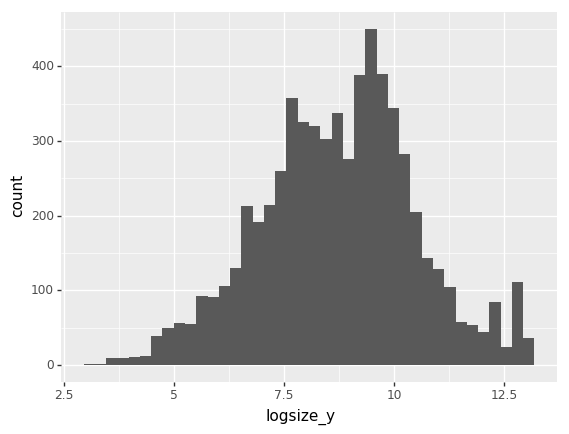

<ggplot: (99651626409)>

In [341]:
(ggplot(monthly_dataset_model_1)
 + aes(x='logsize_y')    
 + geom_histogram(size=20) 
)

In [342]:
# def correlation():
col_names = list(monthly_dataset_model_1.select_dtypes(include = 'float64').columns)
skew_dir = {}
for col in col_names:
    skew_col = monthly_dataset_model_1['logsize_y'].corr(monthly_dataset_model_1[col])
    skew_dir.update({col : skew_col})
pd.DataFrame.from_dict(skew_dir, orient='index')
    

0
vol                                                 0.445763
mv_permco                                           0.637506
ret1                                                0.004908
F1ret                                              -0.001219
prc                                                 0.675613
logsize                                             0.997059
L1ret_1                                             0.013114
L1ret_6                                             0.016389
L1ret_11                                            0.011430
logsize_y                                           1.000000
breakeven_inflation                                 0.086123
CPI for Energy                                      0.155231
M2SL in Billions of Dollars                         0.032514
ACDGNO in Million of Dollars                       -0.018864
Cushing, OK Crude Oil Future Contract 1 (Dollar...  0.159321
Cushing, OK Crude Oil Future Contract 2 (Dollar...  0.160139
Cushing, OK Crude Oil Future Contract 3 (Dollar...  0.160640
Cushing, OK Crude Oil Future Contract 4 (Dollar...  0.160914
Natural Gas Futures Contract 1 (Dollars per Mil...  0.022844
Natural Gas Futures Contract 2 (Dollars per Mil...  0.023058
Natural Gas Futures Contract 3 (Dollars per Mil...  0.024140
Natural Gas Futures Contract 4 (Dollars per Mil...  0.024993
Global Price U.S. Dollars per Barrel                0.159215
NG Consumption Billion Cubic Feet                   0.035543
interest_rate                                       0.012027
inflation_rate                                      0.032634

 - shrout: means Outstanding shares which were issued by companies abd didn't buy back. 'shrout' times 'prc' gives us the 'mv_permco' which is 'logsize' (log of mv_permco).
 - mv_permco: means the market capitalization of the company. 'mv_permco' is the exponential of the 'logsize'. 'logsize_y' is the 1 lead of 'logsize'.
 - F1ret: means 1 lead of the current month's returns which incorporates future information that can't be used in predicting the 'logsize_y'.
 - prc: means the price of the share in USD. 
 - L1ret_6: means return over 6 months lag by 1 month, which can be dropped as it doesn't provide much intuition in addition to the 'L1ret_1'.
 - L1ret_11: means return over 11 months lag by 1 month, which can be dropped as it doesn't provide much intuition in addition to the 'L1ret_1'.
 - logsize: means the log of the 'mv_permco'. As the correlation coefficient of 'logsize' with 'logsize_y' is high, logsize can be dropped, so that we can discover other variables that influence the targe4t variable i.e, 'logsize_y'.

#### Dropping the above listed variables 

In [343]:
drop_cols = ['shrout', 'mv_permco', 'F1ret', 'prc', 'L1ret_6', 'L1ret_11', 'logsize']
monthly_dataset_model_1 = monthly_dataset_model_1.drop(columns = drop_cols)

In [344]:
monthly_dataset_model_1[numerics]

vol      ret1   L1ret_1  logsize_y  breakeven_inflation  \
date                                                                       
2003-01-01  238186.0 -0.142598 -0.011607   8.287055                 1.76   
2003-02-01  173069.0 -0.056568 -0.142598   8.288958                 1.91   
2003-03-01  164922.0  0.000674 -0.056568   8.308867                 1.87   
2003-04-01  112857.0  0.020109  0.000674   8.390830                 1.78   
2003-05-01  110052.0  0.085271  0.020109   8.394496                 1.66   
...              ...       ...       ...        ...                  ...   
2017-08-01  655700.0 -0.041667  0.231939   8.050572                 1.78   
2017-09-01  594196.0  0.041063 -0.041667   7.969240                 1.83   
2017-10-01  745255.0 -0.078113  0.041063   7.860364                 1.86   
2017-11-01  690773.0 -0.103188 -0.078113   7.852852                 1.85   
2017-12-01  481960.0 -0.007484 -0.103188        NaN                 1.90   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-01-01       62.840385                       5793.0   
2003-02-01       66.734025                       5829.2   
2003-03-01       70.282659                       5849.9   
2003-04-01       68.064763                       5887.1   
2003-05-01       66.044013                       5947.3   
...                    ...                          ...   
2017-08-01      101.478104                      13671.0   
2017-09-01      106.316568                      13716.9   
2017-10-01      102.166145                      13779.0   
2017-11-01      103.197713                      13809.5   
2017-12-01      101.825082                      13852.0   

            ACDGNO in Million of Dollars  \
date                                       
2003-01-01                       34936.0   
2003-02-01                       34336.0   
2003-03-01                       34082.0   
2003-04-01                       33536.0   
2003-05-01                       34324.0   
...                                  ...   
2017-08-01                       39896.0   
2017-09-01                       39617.0   
2017-10-01                       40044.0   
2017-11-01                       40832.0   
2017-12-01                       40151.0   

            Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              32.70              
2003-02-01                                              35.73              
2003-03-01                                              33.16              
2003-04-01                                              28.14              
2003-05-01                                              28.07              
...                                                       ...              
2017-08-01                                              48.06              
2017-09-01                                              49.88              
2017-10-01                                              51.69              
2017-11-01                                              56.54              
2017-12-01                                              57.95              

            Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                              31.87              
2003-02-01                                              34.43              
2003-03-01                                              31.69              
2003-04-01                                              26.98              
2003-05-01                                              27.54              
...                                                       ...              
2017-08-01                                              48.30              
2017-09-01    

### Boxcox transformation and Standardization 

In [345]:
#finding skewness in numerical features:
numerics = monthly_dataset_model_1.select_dtypes(include = 'float64').columns
skewed_feats = pd.DataFrame(monthly_dataset_model_1[numerics].skew().sort_values(ascending = False))
skewed_feats

0
vol                                                 3.879384
Natural Gas Futures Contract 1 (Dollars per Mil...  1.440041
Natural Gas Futures Contract 2 (Dollars per Mil...  1.423941
Natural Gas Futures Contract 3 (Dollars per Mil...  1.389902
interest_rate                                       1.371672
Natural Gas Futures Contract 4 (Dollars per Mil...  1.296168
ret1                                                1.215719
L1ret_1                                             1.214067
Global Price U.S. Dollars per Barrel                0.236638
Cushing, OK Crude Oil Future Contract 1 (Dollar...  0.231540
Cushing, OK Crude Oil Future Contract 2 (Dollar...  0.206311
M2SL in Billions of Dollars                         0.179491
Cushing, OK Crude Oil Future Contract 3 (Dollar...  0.178628
Cushing, OK Crude Oil Future Contract 4 (Dollar...  0.152645
NG Consumption Billion Cubic Feet                   0.128723
logsize_y                                          -0.044271
inflation_rate                                     -0.333158
CPI for Energy                                     -0.333509
ACDGNO in Million of Dollars                       -0.710351
breakeven_inflation                                -1.215181

In [346]:
skewed_feats = skewed_feats[abs(skewed_feats[0]) > 0.75] #filtered out high skew

skewed_feats

0
vol                                                 3.879384
Natural Gas Futures Contract 1 (Dollars per Mil...  1.440041
Natural Gas Futures Contract 2 (Dollars per Mil...  1.423941
Natural Gas Futures Contract 3 (Dollars per Mil...  1.389902
interest_rate                                       1.371672
Natural Gas Futures Contract 4 (Dollars per Mil...  1.296168
ret1                                                1.215719
L1ret_1                                             1.214067
breakeven_inflation                                -1.215181

In [347]:
from scipy.special import boxcox1p
skews = skewed_feats.index
print(skews)
lmda = 0.15
for feat in skews:
    monthly_dataset_model_1[feat] = boxcox1p(monthly_dataset_model_1[feat], lmda)


Index(['vol', 'Natural Gas Futures Contract 1 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 2 (Dollars per Million Btu)',
       'Natural Gas Futures Contract 3 (Dollars per Million Btu)',
       'interest_rate',
       'Natural Gas Futures Contract 4 (Dollars per Million Btu)', 'ret1',
       'L1ret_1', 'breakeven_inflation'],
      dtype='object')


In [348]:
numerics = monthly_dataset_model_1.select_dtypes(include = 'float64').columns
skewed_feats_1 = pd.DataFrame(monthly_dataset_model_1[numerics].skew().sort_values(ascending = False))
skewed_feats_1

0
interest_rate                                       0.953539
Natural Gas Futures Contract 3 (Dollars per Mil...  0.681570
Natural Gas Futures Contract 2 (Dollars per Mil...  0.673615
Natural Gas Futures Contract 1 (Dollars per Mil...  0.664070
Natural Gas Futures Contract 4 (Dollars per Mil...  0.660033
Global Price U.S. Dollars per Barrel                0.236638
Cushing, OK Crude Oil Future Contract 1 (Dollar...  0.231540
vol                                                 0.230574
Cushing, OK Crude Oil Future Contract 2 (Dollar...  0.206311
M2SL in Billions of Dollars                         0.179491
Cushing, OK Crude Oil Future Contract 3 (Dollar...  0.178628
Cushing, OK Crude Oil Future Contract 4 (Dollar...  0.152645
NG Consumption Billion Cubic Feet                   0.128723
logsize_y                                          -0.044271
ret1                                               -0.193650
L1ret_1                                            -0.201842
inflation_rate                                     -0.333158
CPI for Energy                                     -0.333509
ACDGNO in Million of Dollars                       -0.710351
breakeven_inflation                                -1.968775

In [349]:
logsize_y = monthly_dataset_model_1['logsize_y']
standardized = monthly_dataset_model_1.drop(columns='logsize_y').groupby('ticker').transform(lambda x: (x - x.mean()) / x.std())
monthly_dataset_model_1 = pd.concat([monthly_dataset_model_1.iloc[:,0:1], standardized, logsize_y],  axis = 1, join = 'inner')

In [350]:
monthly_dataset_model_1

ticker       vol      ret1   L1ret_1  breakeven_inflation  \
date                                                                   
2003-01-01    AHC  0.010835 -2.202878 -0.457005            -1.970180   
2003-02-01    AHC -0.816976 -1.037101 -2.193044            -1.394607   
2003-03-01    AHC -0.938550 -0.310566 -1.029567            -1.545581   
2003-04-01    AHC -1.864967 -0.071918 -0.304465            -1.891923   
2003-05-01    AHC -1.924587  0.701006 -0.066287            -2.368850   
...           ...       ...       ...       ...                  ...   
2017-08-01    LPI  0.574333 -0.206402  1.321263            -0.551558   
2017-09-01    LPI  0.464338  0.293951 -0.204878            -0.386631   
2017-10-01    LPI  0.719755 -0.438570  0.291939            -0.288860   
2017-11-01    LPI  0.633186 -0.602876 -0.435406            -0.321354   
2017-12-01    LPI  0.235873  0.004627 -0.598551            -0.159846   

            CPI for Energy  M2SL in Billions of Dollars  \
date                                                      
2003-01-01       -1.398311                    -1.798053   
2003-02-01       -1.043427                    -1.669220   
2003-03-01       -0.719988                    -1.595550   
2003-04-01       -0.922137                    -1.463159   
2003-05-01       -1.106318                    -1.248912   
...                    ...                          ...   
2017-08-01       -0.637912                     1.544273   
2017-09-01       -0.248697                     1.580942   
2017-10-01       -0.582564                     1.630553   
2017-11-01       -0.499583                     1.654919   
2017-12-01       -0.610000                     1.688871   

            ACDGNO in Million of Dollars  \
date                                       
2003-01-01                     -0.065659   
2003-02-01                     -0.589532   
2003-03-01                     -0.811304   
2003-04-01                     -1.288029   
2003-05-01                     -0.600009   
...                                  ...   
2017-08-01                      1.011344   
2017-09-01                      0.931324   
2017-10-01                      1.053792   
2017-11-01                      1.279800   
2017-12-01                      1.084481   

            Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                          -0.960343              
2003-02-01                                          -0.727835              
2003-03-01                                          -0.925045              
2003-04-01                                          -1.310256              
2003-05-01                                          -1.315627              
...                                                       ...              
2017-08-01                                          -0.939475              
2017-09-01                                          -0.867287              
2017-10-01                                          -0.795496              
2017-11-01                                          -0.603127              
2017-12-01                                          -0.547201              

            Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)  \
date                                                                       
2003-01-01                                          -0.980696              
2003-02-01                                          -0.793248              
2003-03-01                                          -0.993876              
2003-04-01                                          -1.338750              
2003-05-01                                          -1.297746              
...                                                       ...              
2017-08-01                                          -0.959465              
2017-09-01                                          -0.87841

### Missingness and Imputation

In [493]:
monthly_dataset_model_1.isna().sum()

ticker                                                           0
vol                                                              0
ret1                                                            15
L1ret_1                                                         30
breakeven_inflation                                              0
CPI for Energy                                                   0
M2SL in Billions of Dollars                                      0
ACDGNO in Million of Dollars                                     0
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)     0
Natural Gas Futures Contract 1 (Dollars per Million Btu)         0
Natural Gas Futures Contract 2 (Dollars per Million Btu)         0
Natural Gas Futures Contract 3 (Dollars per Million Btu)      

In [494]:
# Imputing the missing values of 'ret1'
monthly_dataset_model_1['ret1'] = monthly_dataset_model_1['ret1'].fillna(monthly_dataset_model_1.groupby('ticker')['ret1'].transform('mean'))

In [495]:
monthly_dataset_model_1.isna().sum()

ticker                                                           0
vol                                                              0
ret1                                                             0
L1ret_1                                                         30
breakeven_inflation                                              0
CPI for Energy                                                   0
M2SL in Billions of Dollars                                      0
ACDGNO in Million of Dollars                                     0
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)     0
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)     0
Natural Gas Futures Contract 1 (Dollars per Million Btu)         0
Natural Gas Futures Contract 2 (Dollars per Million Btu)         0
Natural Gas Futures Contract 3 (Dollars per Million Btu)      

In [496]:
monthly_dataset_model_1['L1ret_1'] = monthly_dataset_model_1['ret1'].shift(periods=1)

In [497]:

monthly_dataset_model_1['L1ret_1'] = monthly_dataset_model_1['L1ret_1'].fillna(-0.011607)

In [498]:
monthly_dataset_model_1 = monthly_dataset_model_1.dropna()

In [499]:
monthly_dataset_model_1.shape
len(monthly_dataset_model_1['ticker'].unique())

(6307, 21)

44

In [500]:
dict_hedgers = {'COG': 14,'CRK': 5,'CXO': 10,'APA': 9,'SWN': 14,'WTI': 10,'RRC': 14,'WLL': 14,'CLR': 8,'MRO': 12,
'PETD': 6, 'LPI': 6,'WPX': 6,'OXY': 8,'APC': 14,'DNR': 11,'SM': 12,'MTDR': 5,'GPOR': 8,'QEP': 5,'OAS': 7,'DVN': 13,
'HES': 9,'CPE': 12,'CRZO': 10,'AREX': 10,'NBL': 8,'UNT': 12,'PDCE': 5,'COP': 4,'EOG': 12,'XEC': 10,'PXD': 11,'NOG': 7,
'PE': 3,'CRC': 2,'CHK': 14}

In [501]:
# List of the independent & integrated companies

integrated = ['BP', 'CVE', 'CVX', '386', 'ECOPETL', 'ENI', 'EQNR', 'XOM', 'GALP', 'HSE', 'IMO', 
              'MOL', 'OMV', '857', 'PETR4','REP', 'RDSA', 'SU', 'FP', 'YPFD'] 

independent = ['APC', 'AR', 'APA', 'AREX', 'COG', 'CPE', 'CRZO', 'CHK', 'XEC', 'CRK', 'CXO', 'COP', 'CLR',
                'CRC', 'DNR', 'DVN', 'FANG', 'ECA', 'EOG', 'EPEG', 'EQT', 'XCOOQ', 'XOG', 'GDPMQ', 'GPOR', 
                'HKRSQ', 'HES', 'LPI', 'LINEQ', 'MRO', 'MTDR', 'MUR', 'NBL', 'NOG', 'OAS', 'OXY', 'PDCE', 
                'PXD', 'PE', 'QEP', 'RRC', 'SNEC', 'SM', 'SWN', 'UPLMQ', 'UNT', 'WTI', 'WLL', 'WPX']

In [502]:
hedger_list = list(dict_hedgers.keys())

non_hedge_monthly = monthly_dataset_model_1[~monthly_dataset_model_1.ticker.isin(hedger_list)]
non_hedge_monthly_integrated = non_hedge_monthly[non_hedge_monthly.ticker.isin(integrated)]
non_hedge_monthly_independent = non_hedge_monthly[non_hedge_monthly.ticker.isin(independent)]

In [503]:
len(non_hedge_monthly_integrated)
len(non_hedge_monthly_independent)

358

587

In [504]:
non_hedge_monthly['ticker'].unique()
non_hedge_monthly.shape
non_hedge_monthly_integrated['ticker'].unique()
non_hedge_monthly_integrated.shape
non_hedge_monthly_independent['ticker'].unique()
non_hedge_monthly_independent.shape

array(['AHC', 'CVX', 'EQT', 'XOM', 'MUR', 'ECA', 'AR'], dtype=object)

(984, 21)

array(['CVX', 'XOM'], dtype=object)

(358, 21)

array(['EQT', 'MUR', 'ECA', 'AR'], dtype=object)

(587, 21)

## Analysis 

In [505]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Non-hedge-monthly-integrated 

In [506]:
X = non_hedge_monthly_integrated.loc[:, ~non_hedge_monthly_integrated.columns.isin(['logsize_y' , 'ticker']) ]
y = non_hedge_monthly_integrated['logsize_y']

In [507]:
# Linear Regression 
model = LinearRegression()
regfit = model.fit(X,y)

print('Rsq: ', regfit.score(X,y))
print('intercept: ', regfit.intercept_)
list(zip(X.columns, regfit.coef_))

Rsq:  0.21482741988763143
intercept:  12.408332413514051


[('vol', 0.08025270009267213),
 ('ret1', 0.031199628465431315),
 ('L1ret_1', 0.02577127946505613),
 ('breakeven_inflation', 0.05217238960668899),
 ('CPI for Energy', 0.04002925783658538),
 ('M2SL in Billions of Dollars', 0.11252439616111233),
 ('ACDGNO in Million of Dollars', 0.020539368912389052),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  0.5999364505440599),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  0.8905352818084381),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  0.4644439175187009),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  -0.8573397189618918),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  -0.02930034078260953),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.04362030616491081),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.15374588294020922),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  -0.19484697240169155

In [508]:
# Lasso
lasso = Lasso(normalize=False)
lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, cv = 5) 

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

lasso_gs_cv.fit(X,y)
lasso_ = Lasso(normalize=False, alpha = lasso_gs_cv.best_params_['alpha'])
lasso_.fit(X, y)

print('Rsq: ', lasso_.score(X, y))
print('intercept: ', lasso_.intercept_)
list(zip(X.columns, lasso_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Rsq:  0.0
intercept:  12.40688097765363


[('vol', 0.0),
 ('ret1', 0.0),
 ('L1ret_1', 0.0),
 ('breakeven_inflation', 0.0),
 ('CPI for Energy', 0.0),
 ('M2SL in Billions of Dollars', 0.0),
 ('ACDGNO in Million of Dollars', 0.0),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)', 0.0),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', -0.0),
 ('Global Price U.S. Dollars per Barrel', 0.0),
 ('NG Consumption Billion Cubic Feet', 0.0),
 ('interest_rate', -0.0),
 ('inflation_rate', -0.0)]

### Non-hedge-monthly-independent

In [509]:
X2 = non_hedge_monthly_independent.loc[:, ~non_hedge_monthly_independent.columns.isin(['logsize_y' , 'ticker']) ]
y2 = non_hedge_monthly_independent['logsize_y']

In [510]:
# Linear Regression 
model2 = LinearRegression()
regfit2 = model2.fit(X2,y2)

print('Rsq: ', regfit2.score(X2,y2))
print('intercept: ', regfit2.intercept_)
list(zip(X2.columns, regfit2.coef_))

Rsq:  0.1889523225416897
intercept:  9.246805582128216


[('vol', -0.09201572423974261),
 ('ret1', 0.04565963284127745),
 ('L1ret_1', 0.031572297715312475),
 ('breakeven_inflation', 0.0046131606015759555),
 ('CPI for Energy', 0.02584061478928546),
 ('M2SL in Billions of Dollars', 0.1016923204263658),
 ('ACDGNO in Million of Dollars', -0.03751189024226251),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  -2.2927695613936705),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  2.754631347748708),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  -4.299188318058112),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  2.7525088742530044),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.06008847095361307),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.07370344632704054),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  -0.05147387299153984),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  0.03399758184633231

In [539]:
data = non_hedge_monthly_independent
cross_validation = data[int(len(data)*0.7):]
test = data[:int(len(data)*0.7)]

In [ ]:
tss = TimeSeriesSplite(5)

cv = tss

model = GridSearchCV(ri)

In [527]:
from sklearn.model_selection import TimeSeriesSplit
data = non_hedge_monthly_independent

data = non_hedge_monthly_independent
cross_validation = data[int(len(data)*0.7):]
test = data[:int(len(data)*0.7)]

tscv = TimeSeriesSplit(n_splits = 5)

for train_index, validation_index in tscv.split(data):
cv_train, cv_test = cross_validation.iloc[train_index], cross_validation.iloc[validation_index]
    
    lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid) # n_jobs = 2, cv = None) 
    lasso_gs_cv.fit(cv_train,cv_test)
    lasso_ = Lasso(normalize=False, alpha = lasso_gs_cv.best_params_['alpha'])
    lasso_.fit(cv_train, cv_test)
    
    print('Rsq: ', lasso_.score(cv_train, cv_test))
    print('intercept: ', lasso_.intercept_)
    list(zip(X2.columns, lasso_.coef_))

NameError: name 'cross_validation' is not defined

In [671]:
macro_data_monthly

date  breakeven_inflation  CPI for Energy  \
0    2003-01                 1.76       62.840385   
1    2003-02                 1.91       66.734025   
2    2003-03                 1.87       70.282659   
3    2003-04                 1.78       68.064763   
4    2003-05                 1.66       66.044013   
5    2003-06                 1.61       67.276177   
6    2003-07                 1.87       67.424037   
7    2003-08                 2.13       69.296927   
8    2003-09                 2.08       71.268390   
9    2003-10                 2.21       67.473324   
10   2003-11                 2.34       65.600434   
11   2003-12                 2.29       64.959708   
12   2004-01                 2.26       67.719757   
13   2004-02                 2.32       69.296927   
14   2004-03                 2.36       70.529091   
15   2004-04                 2.45       71.909116   
16   2004-05                 2.63       75.950615   
17   2004-06                 2.58       78.710663   
18   2004-07                 2.48       77.034920   
19   2004-08                 2.42       76.542054   
20   2004-09                 2.33       76.049188   
21   2004-10                 2.37       77.724932   
22   2004-11                 2.51       78.168511   
23   2004-12                 2.56       75.753469   
24   2005-01                 2.50       74.866310   
25   2005-02                 2.54       76.492767   
26   2005-03                 2.71       79.252815   
27   2005-04                 2.63       84.230760   
28   2005-05                 2.49       83.491461   
29   2005-06                 2.33       84.477193   
30   2005-07                 2.30       87.976540   
31   2005-08                 2.37       91.968752   
32   2005-09                 2.50      102.516080   
33   2005-10                 2.52      100.692476   
34   2005-11                 2.48       92.461618   
35   2005-12                 2.35       88.715838   
36   2006-01                 2.41       93.398063   
37   2006-02                 2.52       91.870179   
38   2006-03                 2.52       92.954484   
39   2006-04                 2.58       99.263166   
40   2006-05                 2.66      103.156805   
41   2006-06                 2.58      104.142537   
42   2006-07                 2.58      106.015427   
43   2006-08                 2.59      105.818280   
44   2006-09                 2.40       98.129574   
45   2006-10                 2.32       89.356564   
46   2006-11                 2.31       88.912985   
47   2006-12                 2.31       91.278740   
48   2007-01                 2.32       90.473890   
49   2007-02                 2.36       90.909584   
50   2007-03                 2.38       97.059563   
51   2007-04                 2.43      102.153823   
52   2007-05                 2.38      107.972597   
53   2007-06                 2.41      108.966707   
54   2007-07                 2.36      107.086917   
55   2007-08                 2.23      103.153848   
56   2007-09                 2.26      103.322901   
57   2007-10                 2.33      102.313019   
58   2007-11                 2.38      107.942039   
59   2007-12                 2.31      107.201262   
60   2008-01                 2.27      108.166786   
61   2008-02                 2.33      108.090884   
62   2008-03                 2.42      113.608024   
63   2008-04                 2.32      118.383400   
64   2008-05                 2.42      126.718746   
65   2008-06                 2.47      135.844156   
66   2008-07                 2.44      138.412972   
67   2008-08                 2.21      131.241775   
68   2008-09                 1.84      127.169225   
69   2008-10                 1.06      114.128490   
70   2008-11                 0.64       93.613938   
71   2008-12                 0.25       84.357919   
72   2009-01                 0.61       86.065206   
73   2009-02                 1.12       88.095320   
74   2009-03                 1.11

In [526]:
# Lasso

lasso = Lasso(normalize=False)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, ) #  cv = 5  # cross validation 괜찮은가 
lasso_gs_cv.fit(X2,y2)
lasso_ = Lasso(normalize=False, alpha = lasso_gs_cv.best_params_['alpha'])
lasso_.fit(X2, y2)

print('Rsq: ', lasso_.score(X2, y2))
print('intercept: ', lasso_.intercept_)
list(zip(X2.columns, lasso_.coef_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Rsq:  0.0
intercept:  9.247660516183988


[('vol', -0.0),
 ('ret1', 0.0),
 ('L1ret_1', 0.0),
 ('breakeven_inflation', 0.0),
 ('CPI for Energy', 0.0),
 ('M2SL in Billions of Dollars', -0.0),
 ('ACDGNO in Million of Dollars', -0.0),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)', 0.0),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', 0.0),
 ('Global Price U.S. Dollars per Barrel', 0.0),
 ('NG Consumption Billion Cubic Feet', -0.0),
 ('interest_rate', 0.0),
 ('inflation_rate', 0.0)]

In [512]:
ridge = Ridge(normalize=False)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

ridge_gs_cv = GridSearchCV(ridge, param_grid=param_grid, n_jobs = 2, cv = 5) 
ridge_gs_cv.fit(X2,y2)
ridge_ = Ridge(normalize=False, alpha = ridge_gs_cv.best_params_['alpha'])
ridge_.fit(X2, y2)

print('Rsq: ', ridge_.score(X2, y2))
print('intercept: ', ridge_.intercept_)
list(zip(X2.columns, ridge_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Rsq:  0.16010676084789577
intercept:  9.246542342835932


[('vol', 0.0011875009009074883),
 ('ret1', 0.016470799725112544),
 ('L1ret_1', 0.011831778898809712),
 ('breakeven_inflation', 0.007525337914232272),
 ('CPI for Energy', 0.02723762976571849),
 ('M2SL in Billions of Dollars', -0.003894232516840532),
 ('ACDGNO in Million of Dollars', -0.019720337219047736),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  0.030200221690855986),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  0.03115657625375828),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  0.031848340178132296),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.03236205647201549),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.016959781983325477),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.017970008485266482),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.019043932879294893),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  0.0201

### Semi-hedge-monthly-independent ( So far No integrated )

In [514]:
semi_hedge_monthly = monthly_dataset_model_1[monthly_dataset_model_1.ticker.isin(semihedger)]
semi_hedge_monthly_integrated = semi_hedge_monthly[semi_hedge_monthly.ticker.isin(integrated)]
semi_hedge_monthly_independent = semi_hedge_monthly[semi_hedge_monthly.ticker.isin(independent)]

print('semi_hedge_monthly_independent: ', semi_hedge_monthly_independent['ticker'].unique())
print('semi_hedge_monthly_integrated: ', semi_hedge_monthly_integrated['ticker'].unique())

semi_hedge_monthly_independent:  ['APA' 'MRO' 'APC']
semi_hedge_monthly_integrated:  []


In [515]:
X3 = semi_hedge_monthly_independent.loc[:, ~semi_hedge_monthly_independent.columns.isin(['logsize_y' , 'ticker']) ]
y3 = semi_hedge_monthly_independent['logsize_y']

In [516]:
# Linear Regression 
model3 = LinearRegression()
regfit3 = model3.fit(X3,y3)

print('Rsq: ', regfit3.score(X3,y3))
print('intercept: ', regfit3.intercept_)
list(zip(X3.columns, regfit3.coef_))

Rsq:  0.6251023901594026
intercept:  10.062601804336609


[('vol', -0.08842606552665147),
 ('ret1', 0.040455997136081286),
 ('L1ret_1', 0.016392119772316006),
 ('breakeven_inflation', 0.03246357862025814),
 ('CPI for Energy', 0.0179127657917739),
 ('M2SL in Billions of Dollars', 0.1450834963240413),
 ('ACDGNO in Million of Dollars', -0.03542355190894007),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  0.6943392626464433),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  0.6970226879313268),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  -3.805544568295213),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  3.537833399419527),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.006798846400313327),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.0017652984644751948),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.16759988339663967),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  -0.10996792766558638

In [517]:
# Lasso
lasso = Lasso(normalize=False)
lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, cv = 5) 

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

lasso_gs_cv.fit(X3,y3)
lasso_ = Lasso(normalize=False, alpha = lasso_gs_cv.best_params_['alpha'])
lasso_.fit(X3, y3)

print('Rsq: ', lasso_.score(X3, y3))
print('intercept: ', lasso_.intercept_)
list(zip(X3.columns, lasso_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Rsq:  0.485710344102217
intercept:  10.062119936272307


[('vol', 0.0),
 ('ret1', 0.0),
 ('L1ret_1', 0.0),
 ('breakeven_inflation', 0.0),
 ('CPI for Energy', 0.02824605453542901),
 ('M2SL in Billions of Dollars', 0.0),
 ('ACDGNO in Million of Dollars', -0.0),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.19409076137825373),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', -0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', -0.0),
 ('Global Price U.S. Dollars per Barrel', 0.0),
 ('NG Consumption Billion Cubic Feet', 0.0),
 ('interest_rate', -0.0),
 ('inflation_rate', -0.0)]

In [518]:
# Ridge
ridge = Ridge(normalize=False)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

ridge_gs_cv = GridSearchCV(ridge, param_grid=param_grid, n_jobs = 2, cv = 5) 
ridge_gs_cv.fit(X3,y3)
ridge_ = Ridge(normalize=False, alpha = ridge_gs_cv.best_params_['alpha'])
ridge_.fit(X3, y3)

print('Rsq: ', ridge_.score(X3, y3))
print('intercept: ', ridge_.intercept_)
list(zip(X3.columns, ridge_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Rsq:  0.5243010130587441
intercept:  10.0623410817764


[('vol', 0.005003487812739171),
 ('ret1', 0.016137716732163503),
 ('L1ret_1', 0.010047546125154419),
 ('breakeven_inflation', 0.011032393617095375),
 ('CPI for Energy', 0.04007597046343472),
 ('M2SL in Billions of Dollars', 0.015332640739880218),
 ('ACDGNO in Million of Dollars', -0.014636472424613543),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  0.03795867390273074),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  0.03925892525334627),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  0.04033350289025684),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.041200580877304396),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.0008326105953871385),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.002082962307132092),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.0031376324973279943),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  0.00355

### Hedger-monthly-independent (So far No integrated )

In [520]:
hedge_monthly = monthly_dataset_model_1[monthly_dataset_model_1.ticker.isin(hedger)]
hedge_monthly_integrated = hedge_monthly[hedge_monthly.ticker.isin(integrated)]
hedge_monthly_independent = hedge_monthly[hedge_monthly.ticker.isin(independent)]

print('hedge_monthly_independent: ', hedge_monthly_independent['ticker'].unique())
print('hedge_monthly_integrated: ', hedge_monthly_integrated['ticker'].unique())

hedge_monthly_independent:  ['CLR' 'RRC' 'PDCE' 'SWN' 'UNT' 'ECA']
hedge_monthly_integrated:  []


In [522]:
X4 = hedge_monthly_independent.loc[:, ~hedge_monthly_independent.columns.isin(['logsize_y' , 'ticker']) ]
y4 = hedge_monthly_independent['logsize_y']

In [523]:
# Linear Regression 
model4 = LinearRegression()
regfit4 = model4.fit(X4,y4)

print('Rsq: ', regfit4.score(X4,y4))
print('intercept: ', regfit4.intercept_)
list(zip(X4.columns, regfit4.coef_))

Rsq:  0.18048724492931356
intercept:  8.67348469657351


[('vol', 0.0954094690461035),
 ('ret1', 0.007379684552264001),
 ('L1ret_1', -0.006777836389684095),
 ('breakeven_inflation', 0.14504956256128493),
 ('CPI for Energy', -0.20763059263606723),
 ('M2SL in Billions of Dollars', 0.4283373041721019),
 ('ACDGNO in Million of Dollars', -0.20259155695080144),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  1.8504358145007356),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  -6.044717687476611),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  12.169719671791487),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  -5.888417606931636),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.3164161132106253),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  -0.391558279687042),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.273736570671215),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  -0.09722122054751328),
 (

In [524]:
# Lasso
lasso = Lasso(normalize=False)
lasso_gs_cv = GridSearchCV(lasso, param_grid=param_grid, n_jobs = 2, cv = 5) 

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

lasso_gs_cv.fit(X4,y4)
lasso_ = Lasso(normalize=False, alpha = lasso_gs_cv.best_params_['alpha'])
lasso_.fit(X4, y4)

print('Rsq: ', lasso_.score(X4, y4))
print('intercept: ', lasso_.intercept_)
list(zip(X3.columns, lasso_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Rsq:  0.0
intercept:  8.671623039647578


[('vol', 0.0),
 ('ret1', -0.0),
 ('L1ret_1', 0.0),
 ('breakeven_inflation', 0.0),
 ('CPI for Energy', 0.0),
 ('M2SL in Billions of Dollars', 0.0),
 ('ACDGNO in Million of Dollars', -0.0),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)', 0.0),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)', 0.0),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)', 0.0),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)', 0.0),
 ('Global Price U.S. Dollars per Barrel', 0.0),
 ('NG Consumption Billion Cubic Feet', 0.0),
 ('interest_rate', -0.0),
 ('inflation_rate', 0.0)]

In [525]:
# Ridge
ridge = Ridge(normalize=False)

alpha_space = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
param_grid = {'alpha': alpha_space}

ridge_gs_cv = GridSearchCV(ridge, param_grid=param_grid, n_jobs = 2, cv = 5) 
ridge_gs_cv.fit(X4,y4)
ridge_ = Ridge(normalize=False, alpha = ridge_gs_cv.best_params_['alpha'])
ridge_.fit(X4, y4)

print('Rsq: ', ridge_.score(X4, y4))
print('intercept: ', ridge_.intercept_)
list(zip(X4.columns, ridge_.coef_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Rsq:  0.14523029586570535
intercept:  8.671487439651907


[('vol', 0.07606358555756786),
 ('ret1', 0.010337105530823896),
 ('L1ret_1', 0.0033254107763630515),
 ('breakeven_inflation', 0.007317471726646661),
 ('CPI for Energy', 0.04706398407587722),
 ('M2SL in Billions of Dollars', 0.05450317976350208),
 ('ACDGNO in Million of Dollars', -0.03294904259749135),
 ('Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
  0.0524195606472338),
 ('Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)',
  0.05516719980969743),
 ('Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
  0.05711783199198539),
 ('Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)',
  0.05847314274859182),
 ('Natural Gas Futures Contract 1 (Dollars per Million Btu)',
  0.002449281673454454),
 ('Natural Gas Futures Contract 2 (Dollars per Million Btu)',
  0.004532507078299978),
 ('Natural Gas Futures Contract 3 (Dollars per Million Btu)',
  0.006285339783683472),
 ('Natural Gas Futures Contract 4 (Dollars per Million Btu)',
  0.00699301856

### USING ARX 

In [202]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

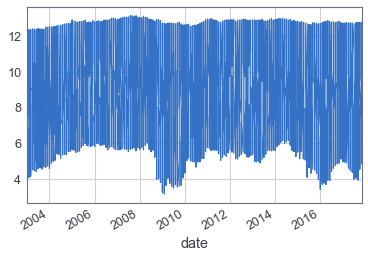

In [217]:
y.plot()

In [225]:
X['ret1']

date
2003-01-01   -0.142598
2003-02-01   -0.056568
2003-03-01    0.000674
2003-04-01    0.020109
2003-05-01    0.085271
2003-06-01    0.009796
2003-07-01   -0.044937
2003-08-01    0.003832
2003-09-01    0.068929
2003-10-01    0.030339
2003-11-01   -0.082332
2003-12-01    0.128773
2004-01-01    0.060561
2004-02-01    0.141160
2004-03-01    0.019114
2004-04-01    0.089614
2004-05-01   -0.007592
2004-06-01    0.126080
2004-07-01    0.052532
2004-08-01   -0.034193
2004-09-01    0.109317
2004-10-01   -0.093146
2004-11-01    0.100855
2004-12-01   -0.069443
2005-01-01    0.051833
2005-02-01    0.158684
2005-03-01   -0.038745
2005-04-01   -0.026608
2005-05-01   -0.008542
2005-06-01    0.150350
2005-07-01    0.106563
2005-08-01    0.078398
2005-09-01    0.084186
2005-10-01   -0.090182
2005-11-01   -0.020624
2005-12-01    0.037545
2006-01-01    0.220628
2006-02-01   -0.106525
2006-03-01    0.031740
2006-05-01    0.046974
2006-06-01    0.059000
2006-07-01    0.000946
2006-08-01   -0.134594
2006-0

In [232]:
X[X.isna().any(axis =1)]

vol      ret1  L1ret_1  breakeven_inflation  CPI for Energy  \
date                                                                            
2007-05-01   217674.0       NaN      NaN                 2.38      107.972597   
2007-06-01    76140.0  0.073826      NaN                 2.41      108.966707   
2013-10-01   472440.0       NaN      NaN                 2.19      117.560314   
2013-11-01   113513.0 -0.028147      NaN                 2.17      114.904754   
2014-05-01   291198.0       NaN      NaN                 2.19      126.164765   
2014-06-01   298921.0  0.012621      NaN                 2.23      128.075113   
2014-12-01  2781389.0       NaN      NaN                 1.70      103.395845   
2015-01-01  1625579.0 -0.070780      NaN                 1.61       94.935311   
2006-02-01      245.0       NaN      NaN                 2.52       91.870179   
2006-03-01     6572.0  0.008000      NaN                 2.52       92.954484   
2008-03-01     8179.0       NaN      NaN                 2.42      113.608024   
2008-04-01    87213.0  0.358251      NaN                 2.32      118.383400   
2010-07-01   359006.0       NaN      NaN                 1.77      104.670889   
2010-08-01   208311.0 -0.156014      NaN                 1.68      104.814313   
2003-11-01    91503.0       NaN      NaN                 2.34       65.600434   
2003-12-01    50165.0  0.107766      NaN                 2.29       64.959708   
2005-01-01   115898.0       NaN      NaN                 2.50       74.866310   
2005-02-01    73972.0  0.093407      NaN                 2.54       76.492767   
2007-08-01   105605.0       NaN      NaN                 2.23      103.153848   
2007-09-01    58963.0  0.167061      NaN                 2.26      103.322901   
2007-11-01    27807.0       NaN      NaN                 2.38      107.942039   
2007-12-01    13043.0 -0.003101      NaN                 2.31      107.201262   
2010-06-01   271434.0       NaN      NaN                 1.94      104.319968   
2010-07-01   126886.0  0.186207      NaN                 1.77      104.670889   
2012-01-01  1122661.0       NaN      NaN                 2.08      116.780601   
2012-02-01   630507.0  0.101942      NaN                 2.22      119.600286   
2012-02-01    88761.0       NaN      NaN                 2.22      119.600286   
2012-03-01    57256.0 -0.076728      NaN                 2.31      124.990266   
2011-12-01    85264.0       NaN      NaN                 2.01      114.492718   
2012-01-01    36756.0 -0.006278      NaN                 2.08      116.780601   

            M2SL in Billions of Dollars  ACDGNO in Million of Dollars  \
date                                                                    
2007-05-01                       7231.3                       36145.0   
2007-06-01                       7264.5                       35913.0   
2013-10-01                      10945.6                       34808.0   
2013-11-01                      10953.3                       36729.0   
2014-05-01                      11314.6                       36930.0   
2014-06-01                      11366.8                       35780.0   
2014-12-01                      11670.3                       38140.0   
2015-01-01                      11733.4                       35825.0   
2006-02-01                       6735.2                       35831.0   
2006-03-01                       6749.6                       36191.0   
2008-03-01                       7642.8                       30618.0   
2008-04-01                       7685.7                       31541.0   
2010-07-01                       8606.6                       28120.0   
2010-08-01                       8656.9                       28207.0   
2003-11-01                       6056.6                       35731.0   
2003-12-01                       6054.7                       35080.0   
2005-01-01                       6411.7                       34201.0   
2005-02-01                       6420.

In [234]:
X[['ret1','L1ret_1']]

ret1   L1ret_1
date                          
2003-01-01 -0.142598 -0.011607
2003-02-01 -0.056568 -0.142598
2003-03-01  0.000674 -0.056568
2003-04-01  0.020109  0.000674
2003-05-01  0.085271  0.020109
2003-06-01  0.009796  0.085271
2003-07-01 -0.044937  0.009796
2003-08-01  0.003832 -0.044937
2003-09-01  0.068929  0.003832
2003-10-01  0.030339  0.068929
2003-11-01 -0.082332  0.030339
2003-12-01  0.128773 -0.082332
2004-01-01  0.060561  0.128773
2004-02-01  0.141160  0.060561
2004-03-01  0.019114  0.141160
2004-04-01  0.089614  0.019114
2004-05-01 -0.007592  0.089614
2004-06-01  0.126080 -0.007592
2004-07-01  0.052532  0.126080
2004-08-01 -0.034193  0.052532
2004-09-01  0.109317 -0.034193
2004-10-01 -0.093146  0.109317
2004-11-01  0.100855 -0.093146
2004-12-01 -0.069443  0.100855
2005-01-01  0.051833 -0.069443
2005-02-01  0.158684  0.051833
2005-03-01 -0.038745  0.158684
2005-04-01 -0.026608 -0.038745
2005-05-01 -0.008542 -0.026608
2005-06-01  0.150350 -0.008542
2005-07-01  0.106563  0.150350
2005-08-01  0.078398  0.106563
2005-09-01  0.084186  0.078398
2005-10-01 -0.090182  0.084186
2005-11-01 -0.020624 -0.090182
2005-12-01  0.037545 -0.020624
2006-01-01  0.220628  0.037545
2006-02-01 -0.106525  0.220628
2006-03-01  0.031740 -0.106525
2006-05-01  0.046974  0.006110
2006-06-01  0.059000  0.046974
2006-07-01  0.000946  0.059000
2006-08-01 -0.134594  0.000946
2006-09-01 -0.093054 -0.134594
2006-10-01  0.023660 -0.093054
2006-11-01  0.185613  0.023660
2006-12-01 -0.011936  0.185613
2007-01-01  0.089167 -0.011936
2007-02-01 -0.019078  0.089167
2007-03-01  0.049282 -0.019078
2007-04-01  0.023075  0.049282
2007-05-01  0.043524  0.023075
2007-06-01 -0.002702  0.043524
2007-07-01  0.037992 -0.002702
2007-08-01  0.002778  0.037992
2007-09-01  0.085710  0.002778
2007-10-01  0.076357  0.085710
2007-11-01 -0.005446  0.076357
2007-12-01  0.417579 -0.005446
2008-01-01 -0.101428  0.417579
2008-02-01  0.028136 -0.101428
2008-03-01 -0.052586  0.028136
2008-04-01  0.204355 -0.052586
2008-05-01  0.156403  0.204355
2008-06-01  0.028337  0.156403
2008-07-01 -0.196450  0.028337
2008-08-01  0.032643 -0.196450
2008-09-01 -0.215166  0.032643
2008-10-01 -0.266447 -0.215166
2008-11-01 -0.102475 -0.266447
2008-12-01 -0.005552 -0.102475
2009-01-01  0.036726 -0.005552
2009-02-01 -0.016544  0.036726
2009-03-01 -0.007131 -0.016544
2009-04-01  0.010886 -0.007131
2009-05-01  0.215368  0.010886
2009-06-01 -0.191320  0.215368
2009-07-01  0.026977 -0.191320
2009-08-01 -0.083514  0.026977
2009-09-01  0.058707 -0.083514
2009-10-01  0.023943  0.058707
2009-11-01  0.058824  0.023943
2009-12-01  0.045549  0.058824
2010-01-01 -0.044793  0.045549
2010-02-01  0.017477 -0.044793
2010-03-01  0.065476  0.017477
2010-04-01  0.015987  0.065476
2010-05-01 -0.162864  0.015987
2010-06-01 -0.051880 -0.162864
2010-07-01  0.064561 -0.051880
2010-08-01 -0.062325  0.064561
2010-09-01  0.178507 -0.062325
2010-10-01  0.066137  0.178507
2010-11-01  0.111376  0.066137
2010-12-01  0.094076  0.111376
2011-01-01  0.099033  0.094076
2011-02-01  0.034593  0.099033
2011-03-01 -0.019763  0.034593
2011-04-01  0.008802 -0.019763
2011-05-01 -0.080619  0.008802
2011-06-01 -0.052765 -0.080619
2011-07-01 -0.082932 -0.052765
2011-08-01 -0.134481 -0.082932
2011-09-01 -0.114257 -0.134481
2011-10-01  0.192528 -0.114257
2011-11-01 -0.037404  0.192528
2011-12-01 -0.055131 -0.037404
2012-01-01 -0.008803 -0.055131
2012-02-01  0.153108 -0.008803
2012-03-01 -0.090419  0.153108
2012-04-01 -0.115522 -0.090419
2012-05-01 -0.161872 -0.115522
2012-06-01 -0.003433 -0.161872
2012-07-01  0.085386 -0.003433
2012-08-01  0.071459  0.085386
2012-09-01  0.065110  0.071459
2012-10-01 -0.027178  0.065110
2012-11-01 -0.050708 -0.027178
2012-12-01  0.069542 -0.050708
2013-01-01  0.268127  0.069542
2013-02-01 -0.009827  0.268127
2013-03-01  0.078346 -0.009827
2013-04-01  0.007960  0.078346
2013-05-01 -0.066085  0.007960
2013-06-01 -0.012164 -0.066085
2013-07-01  0.119868 -0.012164
2013-08-01  0.005238  0.119868
2013-09-01  0.036

In [180]:
MRO = monthly_dataset[monthly_dataset.ticker == 'MRO']

In [182]:
MRO_size =MRO['logsize']

In [186]:
MRO_size

date
2003-01-01     8.775883
2003-02-01     8.875533
2003-03-01     8.912904
2003-04-01     8.861567
2003-05-01     8.983810
2003-06-01     9.007621
2003-07-01     8.984199
2003-08-01     9.065302
2003-09-01     9.086938
2003-10-01     9.123794
2003-11-01     9.125484
2003-12-01     9.236603
2004-01-01     9.217997
2004-02-01     9.296712
2004-03-01     9.347730
2004-04-01     9.344458
2004-05-01     9.351513
2004-06-01     9.478122
2004-07-01     9.473619
2004-08-01     9.437609
2004-09-01     9.566996
2004-10-01     9.487095
2004-11-01     9.522854
2004-12-01     9.475344
2005-01-01     9.504687
2005-02-01     9.705429
2005-03-01     9.697806
2005-04-01     9.690319
2005-05-01     9.733158
2005-06-01     9.829049
2005-07-01     9.918431
2005-08-01    10.066380
2005-09-01    10.135760
2005-10-01     9.999674
2005-11-01     9.986382
2005-12-01    10.014320
2006-01-01    10.246060
2006-02-01    10.160970
2006-03-01    10.237370
2006-04-01    10.278390
2006-05-01    10.211000
2006-06-01 

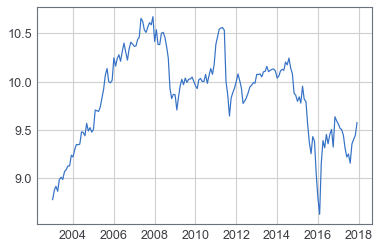

In [188]:
plt.plot(MRO_size)

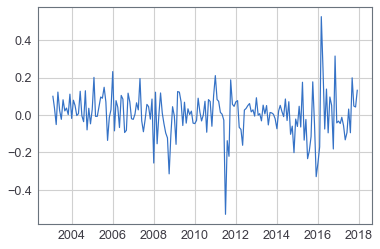

In [204]:
MROsize_1diff = MRO_size.diff()
plt.plot(MROsize_1diff)

In [194]:
mod = SARIMAX(MRO_size, order = (1,1,0), trend = 'c')
mod 

C:\Users\jgwak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [210]:
MRO_size

date
2003-01-01     8.775883
2003-02-01     8.875533
2003-03-01     8.912904
2003-04-01     8.861567
2003-05-01     8.983810
2003-06-01     9.007621
2003-07-01     8.984199
2003-08-01     9.065302
2003-09-01     9.086938
2003-10-01     9.123794
2003-11-01     9.125484
2003-12-01     9.236603
2004-01-01     9.217997
2004-02-01     9.296712
2004-03-01     9.347730
2004-04-01     9.344458
2004-05-01     9.351513
2004-06-01     9.478122
2004-07-01     9.473619
2004-08-01     9.437609
2004-09-01     9.566996
2004-10-01     9.487095
2004-11-01     9.522854
2004-12-01     9.475344
2005-01-01     9.504687
2005-02-01     9.705429
2005-03-01     9.697806
2005-04-01     9.690319
2005-05-01     9.733158
2005-06-01     9.829049
2005-07-01     9.918431
2005-08-01    10.066380
2005-09-01    10.135760
2005-10-01     9.999674
2005-11-01     9.986382
2005-12-01    10.014320
2006-01-01    10.246060
2006-02-01    10.160970
2006-03-01    10.237370
2006-04-01    10.278390
2006-05-01    10.211000
2006-06-01 

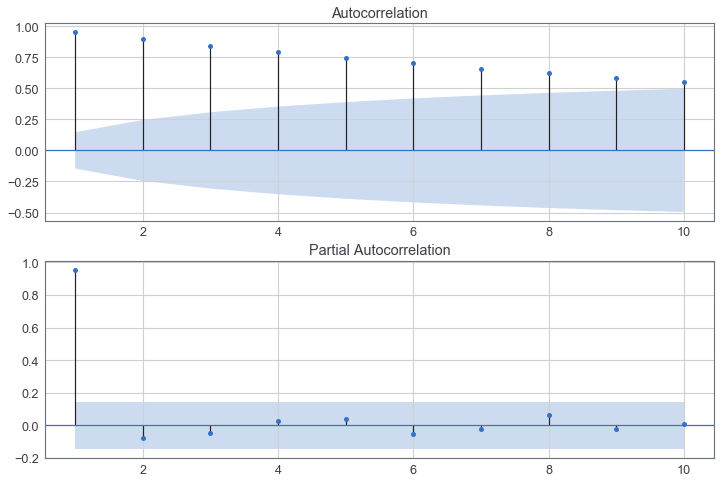

In [215]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (12, 8))
plot_acf(MRO_size, lags = 10, zero= False, ax=ax1)
plot_pacf(MRO_size, lags = 10, zero= False, ax=ax2)
plt.show()

In [442]:
hedge_ratio = pd.read_csv('./hedge_ratio.csv')

In [451]:
hedge_ratio = hedge_ratio[hedge_ratio['hedge_ratio'] <= 1]
meanhedge_ticker = dict(hedge_ratio.groupby('ticker')['hedge_ratio'].mean())
hedger = [i for i,j in meanhedge_ticker.items() if j >= 0.5]
semihedger = [i for i,j in meanhedge_ticker.items() if (j < 0.5) & (j >= 0.1)]
nonhedger = [i for i,j in meanhedge_ticker.items() if j < 0.1]

In [452]:
semihedger

['APA', 'APC', 'MRO']

In [454]:
hedger

['CLR', 'ECA', 'PDCE', 'RRC', 'SWN', 'UNT']